(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)


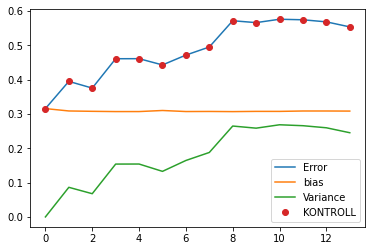

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from common import *
np.random.seed(2018)

n = 40
n_boostraps = 100
maxdegree = 14


# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), lm.LinearRegression())

    y_pred = model.fit(x_train, y_train).predict(x_test).ravel()

    polydegree[degree] = degree
    error[degree] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) ) 
    print(((y_test - y_pred)**2).shape)
    bias[degree] = np.mean( (y_test - np.mean(y_pred, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(y_pred, keepdims=True) )

plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='Variance')
plt.plot(polydegree, bias+variance,"o", label='KONTROLL')
plt.legend()
plt.show()